## Girish Amar Budhrani
## Fruits Classification
####  The dataset can be downloaded via the URL provided below.
#### https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

In [2]:
# importing the required models
import gzip
import os
import numpy as np 
from numpy import argmax
from numpy import array
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dense, MaxPool2D , Dropout 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import EfficientNetB3
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import regularizers
from keras.layers.core import Dropout
import matplotlib.pyplot as plt
import cv2
import random

In [3]:
flatten_image = []
labels = []
for label in os.listdir("./fruits-360/Training//"):
    if(label!= ".DS_Store"):
        for img in os.listdir("./fruits-360/Training/"+label):
            image = cv2.imread("./fruits-360/Training/"+label+"/" + img,1)
            RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            flatten_image.append(RGB_img)
            labels.append(label)    


In [4]:
train_labels = np.array(labels)
train_image = np.array(flatten_image)


In [7]:
train_labels.shape

(67692,)

In [8]:
train_image.shape

(67692, 100, 100, 3)

Tomato 4


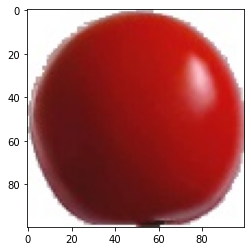

In [9]:
print(train_labels[1])
plt.imshow(train_image[1])
plt.show()

In [10]:
labels = array(train_labels)
# integer encode
label_encoder = LabelEncoder()
int_label = label_encoder.fit_transform(labels)
# binary encode (One hot encoder)
onehot_encoder = OneHotEncoder(sparse=False)
int_reshape = int_label.reshape(len(int_label), 1)
onehot_label = onehot_encoder.fit_transform(int_reshape)
print(onehot_label.shape)

(67692, 131)


In [11]:
X_train, X_test,y_train, y_test = train_test_split(train_image, onehot_label, test_size=0.20)

In [12]:
X_train.shape

(54153, 100, 100, 3)

In [13]:
backbone = EfficientNetB3(
    input_shape=(100, 100, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 4, 4, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 dense_1 (Dense)             (None, 131)               16899     
                                                                 
Total params: 10,997,170
Trainable params: 10,909,867
Non-trainable params: 87,303
_______________________________________

In [14]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train , y_train, epochs = 1, batch_size = 128, validation_data = (X_test, y_test))

424/424 [==============================] - 3577s 8s/step - loss: 0.2586 - accuracy: 0.9493 - val_loss: 0.0861 - val_accuracy: 0.9759


In [14]:
model.save("CNN_model_fruits.h5")

/Users/girishbudhrani/.local/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [15]:
model = load_model("CNN_model_fruits.h5")

In [16]:
testing_image = []
testing_labels = []
for label in os.listdir("./fruits-360/Training//"):
    if(label!= ".DS_Store" and label!= "Banana Lady Finger"):
        for img in os.listdir("./fruits-360/Test/"+label):
            image = cv2.imread("./fruits-360/Test/"+label+"/" + img,1)
            RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            testing_image.append(RGB_img)
            testing_labels.append(label)   

In [17]:
testing_labels = np.array(testing_labels)
testing_image = np.array(testing_image)
testing_image.shape

(22508, 100, 100, 3)

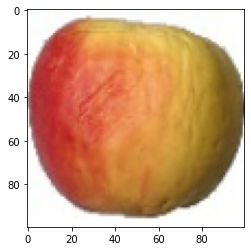

Predicted fruid is ['Apple Red Yellow 1'] and Actutal value is Apple Red Yellow 1 


In [24]:
random_val = random.randint(1,testing_image.shape[0])
pre_image = testing_image[random_val]
predict = model.predict(pre_image.reshape(1,100,100,3))
Final_pre = label_encoder.inverse_transform([argmax(predict)])
plt.imshow(pre_image, cmap = 'gray')
plt.show()
print(f"Predicted fruid is {Final_pre} and Actutal value is {testing_labels[random_val]} ")